## Data Loading:

In [286]:
# libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [287]:
# reading csv file
dataset=pd.read_csv('neighbourhood-crime-rates.csv')
dataset.head(2)
crime=dataset.copy()
crime.head(2)

,_id,AREA_NAME,HOOD_ID,POPN_PROJ_2022,ASSAULT_2014,ASSAULT_2015,ASSAULT_2016,ASSAULT_2017,ASSAULT_2018,ASSAULT_2019,...,THEFTOVER_RATE_2014,THEFTOVER_RATE_2015,THEFTOVER_RATE_2016,THEFTOVER_RATE_2017,THEFTOVER_RATE_2018,THEFTOVER_RATE_2019,THEFTOVER_RATE_2020,THEFTOVER_RATE_2021,THEFTOVER_RATE_2022,geometry
0,1,South Eglinton-Davisville,174,21418,63,61,70,82,85,70,...,21.90341,16.33453,21.59011,5.237247,15.23229,14.82287,24.19784,28.63415,14.00691,"{""type"": ""Polygon"", ""coordinates"": [[[-79.3863..."
1,2,North Toronto,173,14544,45,52,43,52,55,77,...,17.19838,25.91121,17.30553,24.750430,39.41353,30.23432,43.83081,14.24197,27.50275,"{""type"": ""Polygon"", ""coordinates"": [[[-79.3974..."


In [288]:
crime.shape

(158, 167)

## Data Cleaning:

In [289]:
crime_rate_columns =  ['AREA_NAME'] + list(crime.filter(regex='_RATE_').columns)

# Use the list of columns to create a new DataFrame with selected columns
crime_rate_columns = crime[crime_rate_columns].copy()
crime_rate_columns.head(2)

,AREA_NAME,ASSAULT_RATE_2014,ASSAULT_RATE_2015,ASSAULT_RATE_2016,ASSAULT_RATE_2017,ASSAULT_RATE_2018,ASSAULT_RATE_2019,ASSAULT_RATE_2020,ASSAULT_RATE_2021,ASSAULT_RATE_2022,...,THEFTFROMMV_RATE_2022,THEFTOVER_RATE_2014,THEFTOVER_RATE_2015,THEFTOVER_RATE_2016,THEFTOVER_RATE_2017,THEFTOVER_RATE_2018,THEFTOVER_RATE_2019,THEFTOVER_RATE_2020,THEFTOVER_RATE_2021,THEFTOVER_RATE_2022
0,South Eglinton-Davisville,344.9786,332.1355,377.8270,429.4543,431.5816,345.8669,396.8446,577.4554,602.2971,...,84.04146,21.90341,16.33453,21.59011,5.237247,15.23229,14.82287,24.19784,28.63415,14.00691
1,North Toronto,386.9636,449.1277,372.0689,429.0075,433.5488,582.0106,525.9697,740.5825,893.8394,...,123.76240,17.19838,25.91121,17.30553,24.750430,39.41353,30.23432,43.83081,14.24197,27.50275


In [290]:
crime_rate=pd.melt(crime_rate_columns,id_vars=['AREA_NAME'],value_name='crime_rate')
crime_rate['year']=crime_rate['variable'].str.split('_').str[-1]
crime_rate['crime_type']=crime_rate['variable'].str.split('_').str[0]
crime_rate=crime_rate.drop('variable',axis=1)
crime_rate.head(200)
# crime_rate['year']=crime_rate

,AREA_NAME,crime_rate,year,crime_type
0,South Eglinton-Davisville,344.9786,2014,ASSAULT
1,North Toronto,386.9636,2014,ASSAULT
2,Dovercourt Village,412.0070,2014,ASSAULT
3,Junction-Wallace Emerson,655.6819,2014,ASSAULT
4,Yonge-Bay Corridor,3817.8290,2014,ASSAULT
...,...,...,...,...
195,Downtown Yonge East,3026.8460,2015,ASSAULT
196,Church-Wellesley,1136.4890,2015,ASSAULT
197,St Lawrence-East Bayfront-The Islands,861.8472,2015,ASSAULT
198,Harbourfront-CityPlace,576.7151,2015,ASSAULT


In [291]:
# dropping all the rate columns
crime = crime.drop(crime.filter(regex='_RATE_').columns, axis=1)
crime.head()

,_id,AREA_NAME,HOOD_ID,POPN_PROJ_2022,ASSAULT_2014,ASSAULT_2015,ASSAULT_2016,ASSAULT_2017,ASSAULT_2018,ASSAULT_2019,...,THEFTOVER_2014,THEFTOVER_2015,THEFTOVER_2016,THEFTOVER_2017,THEFTOVER_2018,THEFTOVER_2019,THEFTOVER_2020,THEFTOVER_2021,THEFTOVER_2022,geometry
0,1,South Eglinton-Davisville,174,21418,63,61,70,82,85,70,...,4.0,3,4.0,1.0,3.0,3.0,5.0,6.0,3.0,"{""type"": ""Polygon"", ""coordinates"": [[[-79.3863..."
1,2,North Toronto,173,14544,45,52,43,52,55,77,...,2.0,3,2.0,3.0,5.0,4.0,6.0,2.0,4.0,"{""type"": ""Polygon"", ""coordinates"": [[[-79.3974..."
2,3,Dovercourt Village,172,13789,56,57,79,94,94,96,...,5.0,3,5.0,3.0,4.0,3.0,3.0,2.0,4.0,"{""type"": ""Polygon"", ""coordinates"": [[[-79.4341..."
3,4,Junction-Wallace Emerson,171,25777,154,157,166,157,157,182,...,5.0,5,6.0,6.0,7.0,4.0,9.0,8.0,8.0,"{""type"": ""Polygon"", ""coordinates"": [[[-79.4387..."
4,5,Yonge-Bay Corridor,170,14213,394,525,487,603,576,660,...,37.0,30,27.0,35.0,44.0,63.0,35.0,26.0,50.0,"{""type"": ""Polygon"", ""coordinates"": [[[-79.3840..."


In [292]:
# dropping geometry and POPN_PROJ_2022 column
crime=crime.drop(['geometry','POPN_PROJ_2022'],axis=1)
crime.head(3)

,_id,AREA_NAME,HOOD_ID,ASSAULT_2014,ASSAULT_2015,ASSAULT_2016,ASSAULT_2017,ASSAULT_2018,ASSAULT_2019,ASSAULT_2020,...,THEFTFROMMV_2022,THEFTOVER_2014,THEFTOVER_2015,THEFTOVER_2016,THEFTOVER_2017,THEFTOVER_2018,THEFTOVER_2019,THEFTOVER_2020,THEFTOVER_2021,THEFTOVER_2022
0,1,South Eglinton-Davisville,174,63,61,70,82,85,70,82,...,18,4.0,3,4.0,1.0,3.0,3.0,5.0,6.0,3.0
1,2,North Toronto,173,45,52,43,52,55,77,72,...,18,2.0,3,2.0,3.0,5.0,4.0,6.0,2.0,4.0
2,3,Dovercourt Village,172,56,57,79,94,94,96,75,...,40,5.0,3,5.0,3.0,4.0,3.0,3.0,2.0,4.0


In [293]:
# converting wide format data into long format
crime=pd.melt(crime,id_vars=['_id','AREA_NAME','HOOD_ID'],value_name='crime_count')
crime['year']=crime['variable'].str.split('_').str[-1]
crime['crime_type']=crime['variable'].str.split('_').str[0]
crime.tail()


,_id,AREA_NAME,HOOD_ID,variable,crime_count,year,crime_type
12793,154,West Humber-Clairville,1,THEFTOVER_2022,61.0,2022,THEFTOVER
12794,155,Black Creek,24,THEFTOVER_2022,8.0,2022,THEFTOVER
12795,156,Pelmo Park-Humberlea,23,THEFTOVER_2022,9.0,2022,THEFTOVER
12796,157,Humbermede,22,THEFTOVER_2022,9.0,2022,THEFTOVER
12797,158,Humber Summit,21,THEFTOVER_2022,23.0,2022,THEFTOVER


In [294]:
# dropping variable column
crime=crime.drop('variable',axis=1)
crime.head()

,_id,AREA_NAME,HOOD_ID,crime_count,year,crime_type
0,1,South Eglinton-Davisville,174,63.0,2014,ASSAULT
1,2,North Toronto,173,45.0,2014,ASSAULT
2,3,Dovercourt Village,172,56.0,2014,ASSAULT
3,4,Junction-Wallace Emerson,171,154.0,2014,ASSAULT
4,5,Yonge-Bay Corridor,170,394.0,2014,ASSAULT


In [295]:
data=crime.merge(crime_rate,on=['AREA_NAME','year','crime_type'])

In [296]:
data.shape

(12798, 7)

In [297]:
data.isna().sum()

_id               0
AREA_NAME         0
HOOD_ID           0
crime_count    1520
year              0
crime_type        0
crime_rate     1521
dtype: int64

In [298]:
# sns.set_style("darkgrid")
# sns.histplot(data=crime['frequency'],bins=20)
# plt.show()

In [299]:
# sns.boxplot(data=crime,x='crime_type',y='frequency')
# plt.xticks(rotation=90)
# plt.show()

In [300]:
crime_count_dict=data.groupby('year')['crime_count'].median().to_dict()
crime_count_dict

{'2014': 20.0,
 '2015': 19.0,
 '2016': 18.0,
 '2017': 20.0,
 '2018': 20.0,
 '2019': 22.0,
 '2020': 21.0,
 '2021': 18.0,
 '2022': 22.0}

In [301]:
# filling nan value with frequency of crime each year's median value 
data['crime_count']=data['crime_count'].fillna(data['year'].map(crime_count_dict))
data.isna().sum()

_id               0
AREA_NAME         0
HOOD_ID           0
crime_count       0
year              0
crime_type        0
crime_rate     1521
dtype: int64

In [302]:
crime_rate_dict=data.groupby('year')['crime_rate'].median().to_dict()
crime_rate_dict

{'2014': 129.1069,
 '2015': 115.10990000000001,
 '2016': 118.6031,
 '2017': 116.42075,
 '2018': 125.7141,
 '2019': 118.16915,
 '2020': 118.54599999999999,
 '2021': 113.5919,
 '2022': 126.8125}

In [303]:
# filling nan value with frequency of crime each year's median value 
data['crime_rate']=data['crime_rate'].fillna(data['year'].map(crime_rate_dict))
data.isna().sum()

_id            0
AREA_NAME      0
HOOD_ID        0
crime_count    0
year           0
crime_type     0
crime_rate     0
dtype: int64

In [304]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12798 entries, 0 to 12797
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   _id          12798 non-null  int64  
 1   AREA_NAME    12798 non-null  object 
 2   HOOD_ID      12798 non-null  int64  
 3   crime_count  12798 non-null  float64
 4   year         12798 non-null  object 
 5   crime_type   12798 non-null  object 
 6   crime_rate   12798 non-null  float64
dtypes: float64(2), int64(2), object(3)
memory usage: 799.9+ KB


In [305]:
data.head()

,_id,AREA_NAME,HOOD_ID,crime_count,year,crime_type,crime_rate
0,1,South Eglinton-Davisville,174,63.0,2014,ASSAULT,344.9786
1,2,North Toronto,173,45.0,2014,ASSAULT,386.9636
2,3,Dovercourt Village,172,56.0,2014,ASSAULT,412.0070
3,4,Junction-Wallace Emerson,171,154.0,2014,ASSAULT,655.6819
4,5,Yonge-Bay Corridor,170,394.0,2014,ASSAULT,3817.8290


In [353]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12798 entries, 0 to 12797
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   _id          12798 non-null  int64  
 1   AREA_NAME    12798 non-null  object 
 2   HOOD_ID      12798 non-null  int64  
 3   crime_count  12798 non-null  float64
 4   year         12798 non-null  object 
 5   crime_type   12798 non-null  object 
 6   crime_rate   12798 non-null  float64
dtypes: float64(2), int64(2), object(3)
memory usage: 1.3+ MB


In [354]:
# converting datatypes
data['year'].astype(int)
data['crime_count'].astype(int)
data['crime_rate'].astype(float)

0         344.97860
1         386.96360
2         412.00700
3         655.68190
4        3817.82900
            ...    
12793     169.52450
12794      34.96809
12795      75.63660
12796      54.43329
12797     173.74230
Name: crime_rate, Length: 12798, dtype: float64

## Data Visualization:

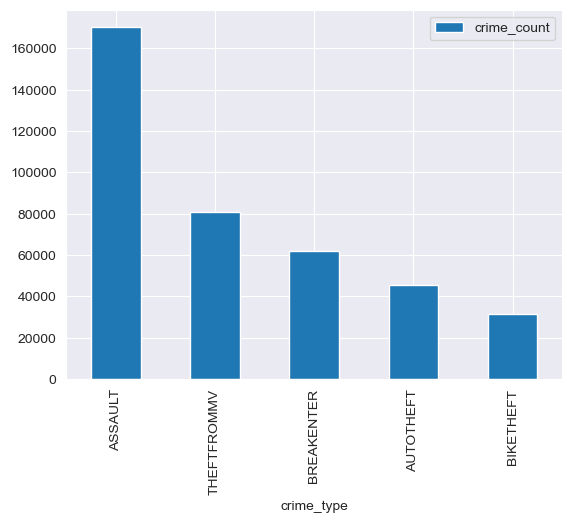

In [355]:
assault=crime.groupby('crime_type')['crime_count'].sum().reset_index()
assault_top=assault.sort_values('crime_count',ascending=False).head()
# sns.catplot(kind='bar',x='crime_type',y='crime_count',data=assault_top)
assault_top.plot(kind='bar',x='crime_type',y='crime_count')
plt.show()

In [ ]:
# Are certain types of crimes increasing or decreasing?

C:\Users\iamsuzank\anaconda3\lib\site-packages\seaborn\axisgrid.py:848: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  func(*plot_args, **plot_kwargs)


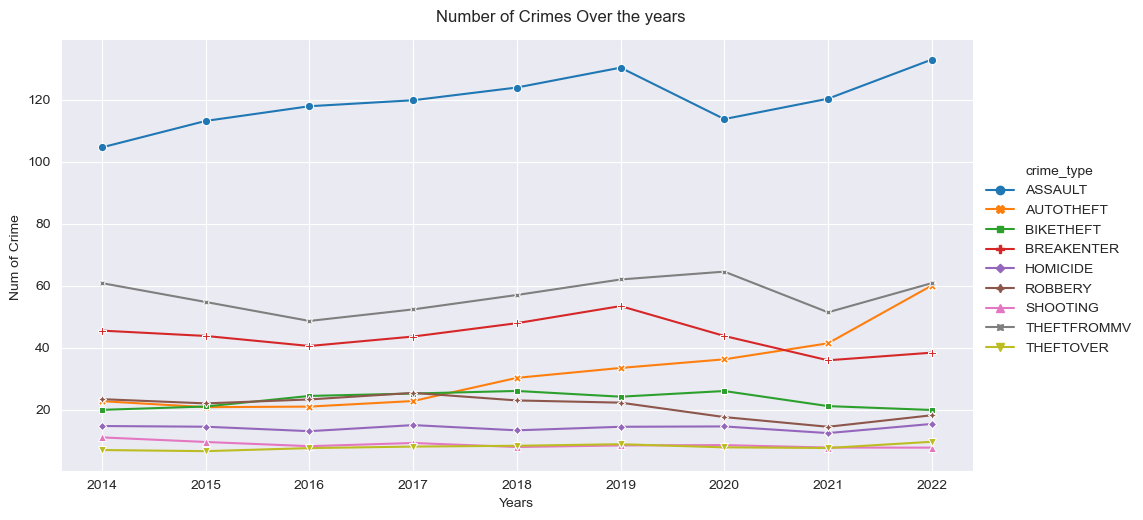

In [357]:
sns.set_style('darkgrid')
# sns.set_palette(custom_palette)

g = sns.relplot(data=data, kind='line',  x='year', y='crime_count',markers=True, dashes=False, style='crime_type', 
                hue='crime_type',
                aspect=2,ci=None)

g.fig.suptitle("Number of Crimes Over the years ", y=1.03)
g.set(xlabel='Years',
      ylabel='Num of Crime ')

# Rotate the x-axis labels
plt.xticks(rotation=0)

# Show the plot
plt.show()


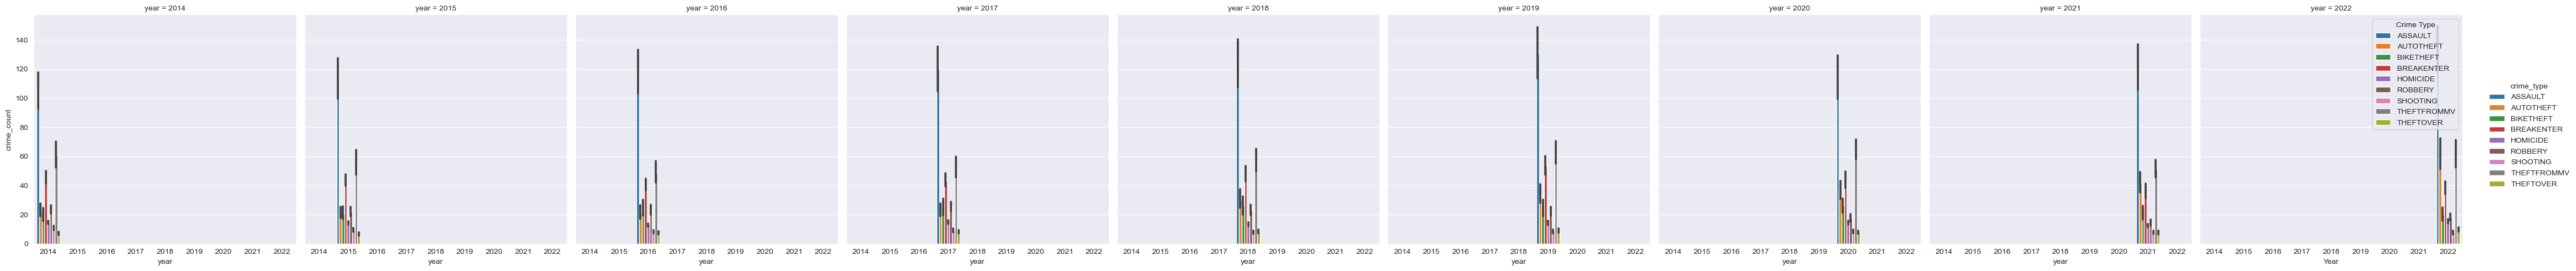

In [349]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming you have your data and other parameters already defined

# Create a Seaborn bar plot
sns.catplot(kind='bar',data=data, x='year', y='crime_count', hue='crime_type',col='year')

# Add labels and a legend
plt.xlabel('Year')
plt.ylabel('Crime Count')
plt.legend(title='Crime Type')

# Show the plot
plt.show()


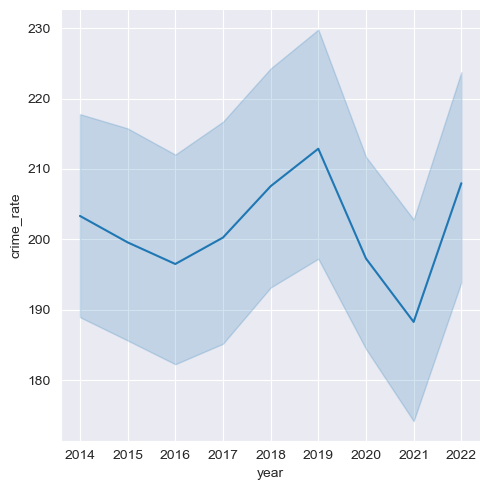

In [362]:
sns.relplot(data=data,kind='line',x='year',y='crime_rate')
plt.show()

In [363]:
# Are there correlations between crime rates and demographic factors (e.g., age, income, education)?
data[['HOOD_ID','crime_count','crime_rate']].corr()

,HOOD_ID,crime_count,crime_rate
HOOD_ID,1.000000,0.060174,0.056552
crime_count,0.060174,1.000000,0.906420
crime_rate,0.056552,0.906420,1.000000


In [367]:
x=pd.read_csv('Major_Crime_Indicators_Open_Data.csv')
x.head()

,X,Y,OBJECTID,EVENT_UNIQUE_ID,REPORT_DATE,OCC_DATE,REPORT_YEAR,REPORT_MONTH,REPORT_DAY,REPORT_DOY,...,UCR_CODE,UCR_EXT,OFFENCE,MCI_CATEGORY,HOOD_158,NEIGHBOURHOOD_158,HOOD_140,NEIGHBOURHOOD_140,LONG_WGS84,LAT_WGS84
0,-79.425896,43.757346,1,GO-20141262074,2014/01/01 05:00:00+00,1998/06/01 04:00:00+00,2014,January,1,1,...,1480,110,Administering Noxious Thing,Assault,38,Lansing-Westgate,38,Lansing-Westgate (38),-79.425896,43.757346
1,-79.350229,43.646293,2,GO-20141260701,2014/01/01 05:00:00+00,2014/01/01 05:00:00+00,2014,January,1,1,...,2120,200,B&E,Break and Enter,70,South Riverdale,70,South Riverdale (70),-79.350229,43.646293
2,-79.376497,43.666423,3,GO-20141260889,2014/01/01 05:00:00+00,2014/01/01 05:00:00+00,2014,January,1,1,...,1430,100,Assault,Assault,74,North St.James Town,74,North St.James Town (74),-79.376497,43.666423
3,-85.488744,0.000000,4,GO-20141260973,2014/01/01 05:00:00+00,2014/01/01 05:00:00+00,2014,January,1,1,...,2130,210,Theft Over,Theft Over,NSA,NSA,NSA,NSA,-85.488744,0.000000
4,-79.344839,43.678946,5,GO-20141261050,2014/01/01 05:00:00+00,2014/01/01 05:00:00+00,2014,January,1,1,...,1430,100,Assault,Assault,69,Blake-Jones,66,Danforth (66),-79.344839,43.678946


In [390]:
# x.groupby('REPORT_YEAR')['MCI_CATEGORY'].count()
x['REPORT_YEAR'].value_counts()


2022    41521
2019    40118
2018    37371
2020    35168
2017    35145
2021    35097
2016    33529
2015    32880
2014    32467
Name: REPORT_YEAR, dtype: int64

In [391]:
data.groupby('year')['crime_count'].sum()

year
2014    48891.0
2015    48331.0
2016    48086.0
2017    50753.0
2018    53317.0
2019    56437.0
2020    52556.0
2021    49333.0
2022    57321.0
Name: crime_count, dtype: float64

In [368]:
x.columns

Index(['X', 'Y', 'OBJECTID', 'EVENT_UNIQUE_ID', 'REPORT_DATE', 'OCC_DATE',
       'REPORT_YEAR', 'REPORT_MONTH', 'REPORT_DAY', 'REPORT_DOY', 'REPORT_DOW',
       'REPORT_HOUR', 'OCC_YEAR', 'OCC_MONTH', 'OCC_DAY', 'OCC_DOY', 'OCC_DOW',
       'OCC_HOUR', 'DIVISION', 'LOCATION_TYPE', 'PREMISES_TYPE', 'UCR_CODE',
       'UCR_EXT', 'OFFENCE', 'MCI_CATEGORY', 'HOOD_158', 'NEIGHBOURHOOD_158',
       'HOOD_140', 'NEIGHBOURHOOD_140', 'LONG_WGS84', 'LAT_WGS84'],
      dtype='object')

In [385]:
selected_columns=['REPORT_DATE',
        'OCC_YEAR', 'OCC_MONTH', 'OCC_DAY', 
       'OCC_HOUR', 'PREMISES_TYPE', 'MCI_CATEGORY', 'HOOD_158', 'NEIGHBOURHOOD_158',
       'LONG_WGS84', 'LAT_WGS84']

    # Use the filter method to select specific columns
filtered_df = x.filter(items=selected_columns)
    
filtered_df.tail(20)


,REPORT_DATE,OCC_YEAR,OCC_MONTH,OCC_DAY,OCC_HOUR,PREMISES_TYPE,MCI_CATEGORY,HOOD_158,NEIGHBOURHOOD_158,LONG_WGS84,LAT_WGS84
323276,2022/12/31 05:00:00+00,2022.0,December,31.0,0,Commercial,Break and Enter,21,Humber Summit,-79.552195,43.769122
323277,2022/12/31 05:00:00+00,2022.0,December,30.0,23,Outside,Theft Over,38,Lansing-Westgate,-79.412053,43.763068
323278,2022/12/31 05:00:00+00,2022.0,December,30.0,23,Commercial,Break and Enter,27,York University Heights,-79.490127,43.782580
323279,2022/12/31 05:00:00+00,2022.0,December,29.0,16,Other,Assault,165,Harbourfront-CityPlace,-79.397989,43.637043
323280,2022/12/31 05:00:00+00,2022.0,December,31.0,20,Commercial,Assault,141,Golfdale-Cedarbrae-Woburn,-79.223585,43.759327
323281,2022/12/31 05:00:00+00,2022.0,December,30.0,18,Apartment,Assault,91,Weston-Pelham Park,-79.457847,43.669029
323282,2022/12/31 05:00:00+00,2022.0,December,30.0,20,Commercial,Robbery,84,Little Portugal,-79.441017,43.650275
323283,2022/12/31 05:00:00+00,2022.0,December,30.0,17,Apartment,Theft Over,50,Newtonbrook East,-79.418131,43.790247
323284,2022/12/31 05:00:00+00,2022.0,December,30.0,18,Apartment,Theft Over,156,Bendale-Glen Andrew,-79.258766,43.773233
323285,2022/12/31 05:00:00+00,2022.0,December,29.0,16,Other,Assault,165,Harbourfront-CityPlace,-79.397989,43.637043


In [384]:
import pandas as pd
filtered_df['HOOD_158'].astype(int)
data['HOOD_ID'].astype(int)
# Assuming you have defined 'filtered_df' and 'data' DataFrames and the columns to merge on.

x=[]
data check_int(x):
    for i in x:
        if i.dtype!=int
        del i

ValueError: invalid literal for int() with base 10: 'NSA'